<a href="https://colab.research.google.com/github/nafiul-araf/Lab-work/blob/main/K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Load The Data***

In [92]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

plt.rcParams["figure.figsize"] = (15, 7)

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [93]:
df=pd.read_csv("/content/gdrive/MyDrive/CSE-464(Project)/Copy of Depression and Happiness Factor Analysis.csv")

In [94]:
#df.head(1)

In [95]:
df.columns

Index(['Timestamp', 'Which year are you in?', 'How are you feeling right now?',
       'On a scale of 1-100, how would you express this feeling?', 'Gender',
       'Age', 'Your location ?', 'Relationship status',
       'Are you happy with your financial state?',
       'How much have you succeeded to cope up with the environment of your educational institution?',
       'Understanding with your family members?',
       'Are you feeling pressure in your study or work right now?',
       'Are you satisfied with your academic result?',
       'Are you happy with your living place?',
       'Who supports you when you are not succeeding in your academic life?',
       'Have you used any social media within the last 6 hours?',
       'Are you satisfied with your meal today?',
       'Are you feeling sick/health issues today?',
       'Have you done any recreational activity (sports, gaming, hobby etc.) today?',
       'How long did you sleep last night?(in hours)', 'Unnamed: 20'],
      dty

### ***Encoding (Part-1)***

In [96]:
from sklearn.preprocessing import LabelEncoder

In [97]:
le=LabelEncoder()

In [98]:
df['Feelings_label']=le.fit_transform(df['How are you feeling right now?'])

In [99]:
#df.head(2)

In [100]:
df=df.drop(['How are you feeling right now?'],axis='columns')

In [101]:
#df.head(1)

### ***Normalizing (Part-1)***

In [102]:
from scipy.cluster.vq import whiten

In [103]:
df['scaled_sleeping_hour']=whiten(df['How long did you sleep last night?(in hours)'])

In [104]:
df['scaled_label']=whiten(df['Feelings_label'])

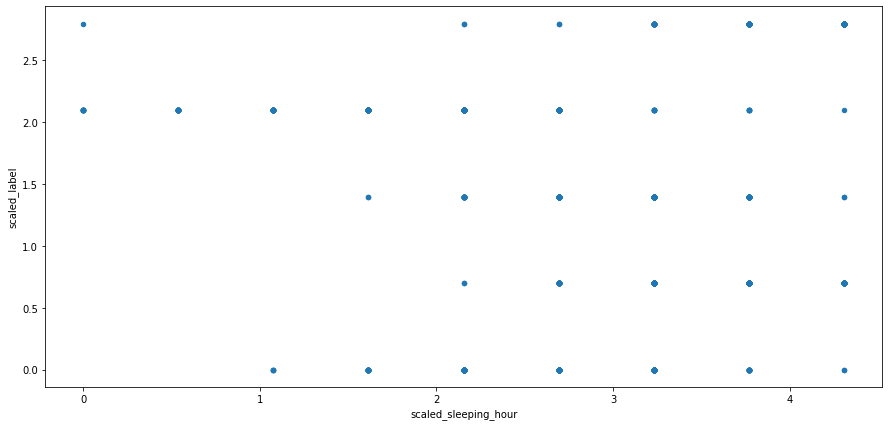

In [105]:
df.plot(x='scaled_sleeping_hour',y='scaled_label',kind='scatter')

plt.show()

In [106]:
print(df[['scaled_sleeping_hour','scaled_label']].describe())

       scaled_sleeping_hour  scaled_label
count            920.000000    920.000000
mean               3.076473      1.447678
std                1.000544      1.000544
min                0.000000      0.000000
25%                2.691987      0.698408
50%                3.230385      1.396816
75%                3.768782      2.095224
max                4.307180      2.793632


### ***Clustering Part 1 (Test)***

In [107]:
from scipy.cluster.vq import kmeans, vq

In [108]:
cluster_centers, distortion = kmeans(df[['scaled_sleeping_hour', 'scaled_label']], 2)

In [109]:
df['cluster_labels'], distortion_list = vq(df[['scaled_sleeping_hour', 'scaled_label']], cluster_centers)

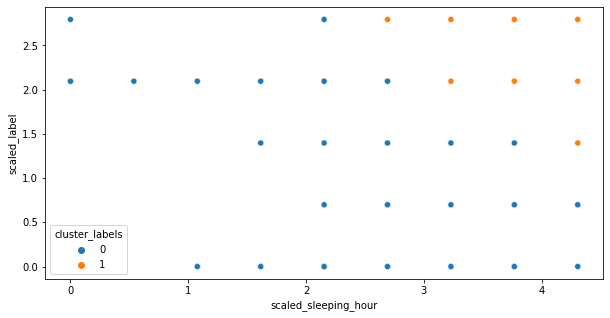

In [110]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='scaled_sleeping_hour', y='scaled_label', 
                hue='cluster_labels', data = df)

plt.show()

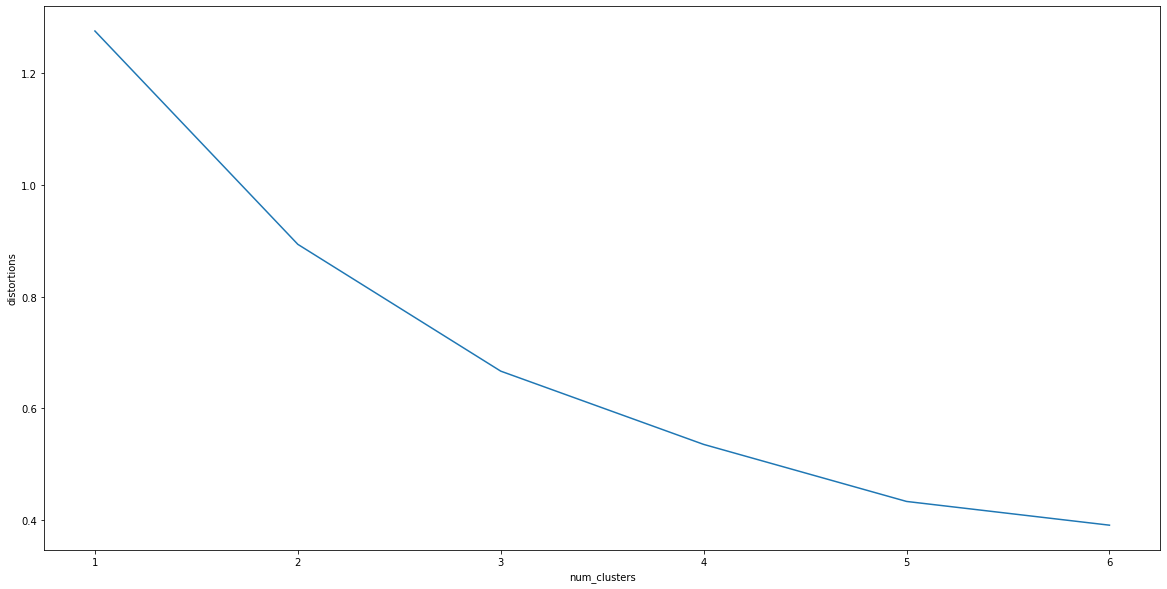

In [111]:
distortions=[]
num_clusters = range(1, 7)

for i in num_clusters:
    cluster_centers,distortion=kmeans(df[['scaled_sleeping_hour','scaled_label']],i)
    distortions.append(distortion)
    
elbow_plot=pd.DataFrame({
    'num_clusters':num_clusters,
    'distortions':distortions
})

plt.figure(figsize=(20, 10))

sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

Impact of Seeds

In [112]:
from numpy import random

In [113]:
random.seed(0)

### ***Clustering Part-2 (Test)***

In [114]:
cluster_centers, distortion = kmeans(df[['scaled_sleeping_hour', 'scaled_label']], 5)

In [115]:
df['cluster_labels'], distortion_list = vq(df[['scaled_sleeping_hour', 'scaled_label']], cluster_centers)

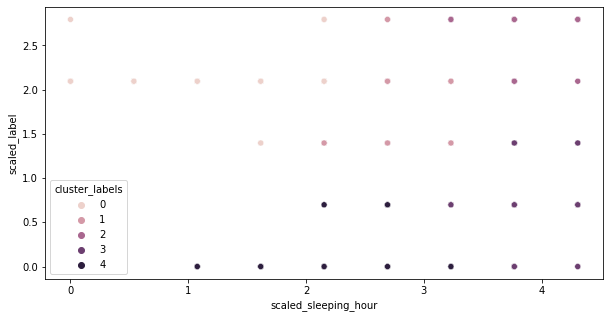

In [116]:
plt.figure(figsize=(10, 5))

sns.scatterplot(x='scaled_sleeping_hour', y='scaled_label', 
                hue='cluster_labels', data = df)
plt.show()

In [117]:
random.seed([1,2,1000])

### ***Clustering Part-3 (Test)***

In [118]:
cluster_centers, distortion = kmeans(df[['scaled_sleeping_hour', 'scaled_label']], 4)

In [119]:
df['cluster_labels'], distortion_list = vq(df[['scaled_sleeping_hour', 'scaled_label']], cluster_centers)

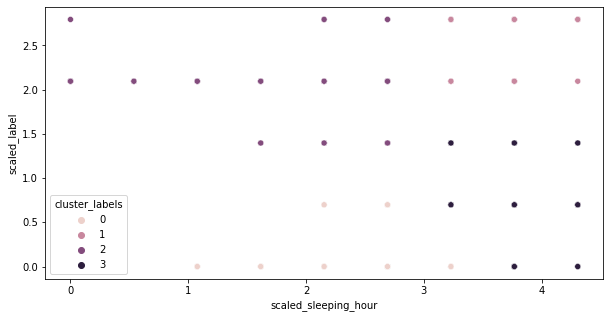

In [120]:
plt.figure(figsize=(10, 5))

sns.scatterplot(x='scaled_sleeping_hour', y='scaled_label', 
                hue='cluster_labels', data = df)
plt.show()

In [121]:
random.seed([1000, 2000])

### ***Clustering Part-4 (Test)***

In [122]:
cluster_centers,_ = kmeans(df[['scaled_sleeping_hour', 'scaled_label']], 5)

In [123]:
df['cluster_labels'],_ = vq(df[['scaled_sleeping_hour', 'scaled_label']], cluster_centers)

In [124]:
print(df[['scaled_sleeping_hour','scaled_label','cluster_labels']].groupby('cluster_labels').mean())

                scaled_sleeping_hour  scaled_label
cluster_labels                                    
0                           2.498164      0.099773
1                           4.090837      2.771308
2                           3.704570      0.743260
3                           2.809030      1.548644
4                           1.393755      2.100856


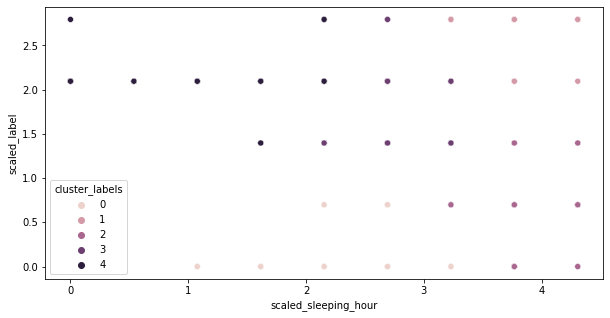

In [125]:
plt.figure(figsize=(10, 5))

sns.scatterplot(x='scaled_sleeping_hour', y='scaled_label', hue='cluster_labels', data=df)
plt.show()

In [126]:
#df.head(1)

### ***Encoding (Part-2)***

In [127]:
df['Year_label']=le.fit_transform(df['Which year are you in?'])

In [128]:
df['Gender_label']=le.fit_transform(df['Gender'])

In [129]:
df['Loc_label']=le.fit_transform(df['Your location ?'])

In [130]:
df['Relationship_label']=le.fit_transform(df['Relationship status'])

In [131]:
df['Financial_label']=le.fit_transform(df['Are you happy with your financial state?'])

In [132]:
df['Unders_Fam_label']=le.fit_transform(df['Understanding with your family members?'])

In [133]:
df['Studey_press_label']=le.fit_transform(df['Are you feeling pressure in your study or work right now?'])

In [134]:
df['Satisfy_ac_res_label']=le.fit_transform(df['Are you satisfied with your academic result?'])

In [135]:
df['Living_place_hap_label']=le.fit_transform(df['Are you happy with your living place?'])

In [136]:
df['Support_ac_life_label']=le.fit_transform(df['Who supports you when you are not succeeding in your academic life?'])

In [137]:
df['Use_social_label']=le.fit_transform(df['Have you used any social media within the last 6 hours?'])

In [138]:
df['Meal_satisfaction_label']=le.fit_transform(df['Are you satisfied with your meal today?'])

In [139]:
df['Sickness_label']=le.fit_transform(df['Are you feeling sick/health issues today?'])

In [140]:
df['Recreation_label']=le.fit_transform(df['Have you done any recreational activity (sports, gaming, hobby etc.) today?'])

In [141]:
df=df.drop(['Gender','Your location ?','Relationship status','Are you happy with your financial state?','Understanding with your family members?','Are you feeling pressure in your study or work right now?','Are you satisfied with your academic result?','Are you happy with your living place?','Who supports you when you are not succeeding in your academic life?','Have you used any social media within the last 6 hours?','Are you satisfied with your meal today?','Are you feeling sick/health issues today?','Have you done any recreational activity (sports, gaming, hobby etc.) today?','Unnamed: 20'],axis='columns')

In [142]:
#df.head(1)

### ***Normalizing(Part-2)***

In [143]:
features=['Year_label','Studey_press_label','Living_place_hap_label','Use_social_label','Meal_satisfaction_label','Sickness_label','Recreation_label','Loc_label','Satisfy_ac_res_label','Inferioty_label','Age','How much have you succeeded to cope up with the environment of your educational institution?']

In [144]:
scaled_features=[
    'scaled_Year_label',
    'scaled_Studey_press_label',
    'scaled_Living_place_hap_label',
    'scaled_Use_social_label',
    'scaled_Meal_satisfaction_label',
    'scaled_Sickness_label',
    'scaled_Recreation_label',
    'scaled_Loc_label',
    'scaled_Satisfy_ac_res_label',
    'scaled_age',
    'scaled_sleeping_hour',
    'scaled_label',
    'scaled_cope_edu_inst'
]

In [145]:
df['scaled_Year_label'] = whiten(df['Year_label'])
df['scaled_Studey_press_label'] = whiten(df['Studey_press_label'])
df['scaled_Living_place_hap_label'] = whiten(df['Living_place_hap_label'])
df['scaled_Use_social_label'] = whiten(df['Use_social_label'])
df['scaled_Meal_satisfaction_label'] = whiten(df['Meal_satisfaction_label'])
df['scaled_Sickness_label'] = whiten(df['Sickness_label'])
df['scaled_Recreation_label'] = whiten(df['Recreation_label'])
df['scaled_Loc_label'] = whiten(df['Loc_label'])
df['scaled_Satisfy_ac_res_label'] = whiten(df['Satisfy_ac_res_label'])
df['scaled_age'] = whiten(df['Age'])
df['scaled_cope_edu_inst'] = whiten(df['How much have you succeeded to cope up with the environment of your educational institution?'])

### ***Clustering Part-1 (Main)***

**By taking the clusters among all the features**

To find the possible numbers of cluster (probability)

**1. Elbow Plot**

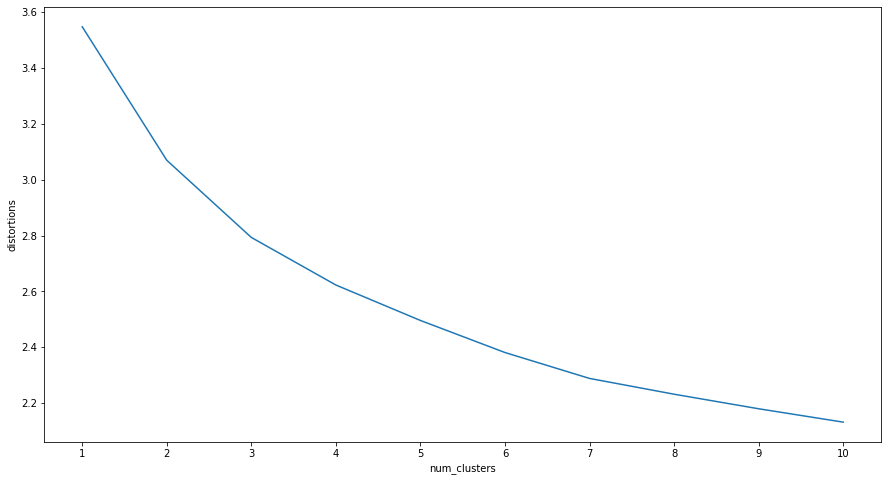

In [146]:
distortions=[]
num_clusters = range(1, 11)

for i in num_clusters:
    cluster_centers,distortion=kmeans(df[scaled_features],i)
    distortions.append(distortion)
    
elbow_plot=pd.DataFrame({
    'num_clusters':num_clusters,
    'distortions':distortions
})

plt.figure(figsize=(15, 8))

sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

**2. Dendrogram**

In [147]:
from scipy.cluster.hierarchy import linkage,dendrogram

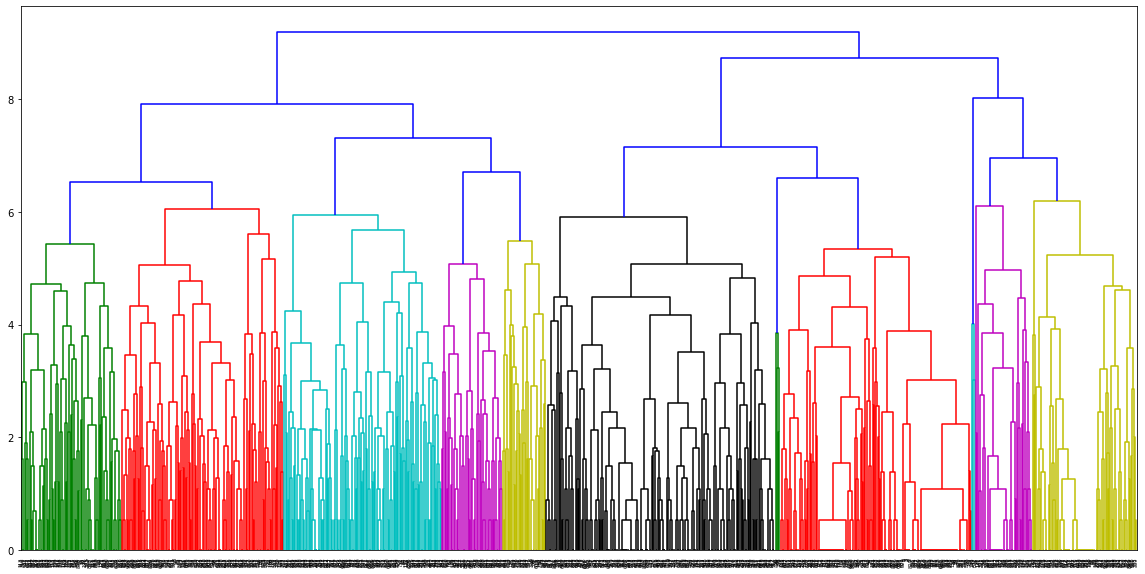

In [148]:
plt.figure(figsize=(20, 10))

Z=linkage(df[scaled_features],method='complete',metric='euclidean')
dn=dendrogram(Z)
plt.show()

In [149]:
cluster_centers,_ = kmeans(df[scaled_features], 9)

df['cluster_labels'], _ = vq(df[scaled_features], cluster_centers)
df.groupby('cluster_labels')[scaled_features].mean()

,scaled_Year_label,scaled_Studey_press_label,scaled_Living_place_hap_label,scaled_Use_social_label,scaled_Meal_satisfaction_label,scaled_Sickness_label,scaled_Recreation_label,scaled_Loc_label,scaled_Satisfy_ac_res_label,scaled_age,scaled_sleeping_hour,scaled_label,scaled_cope_edu_inst
cluster_labels,,,,,,,,,,,,,
0,1.627096,1.893615,2.047827,2.007354,0.968495,0.000000,1.445396,1.445730,0.000000,19.564789,2.777902,0.787566,3.032529
1,2.314988,0.109449,2.147676,1.779441,2.386893,0.000000,1.499600,2.897991,0.000000,20.274183,4.126206,2.729073,3.390325
2,2.400485,2.003136,2.175093,0.894125,2.409843,0.329847,0.432413,2.718401,0.018588,20.353379,3.507501,0.908957,3.380666
3,0.130099,0.059202,1.957584,1.601017,2.140785,0.054375,1.290462,2.922550,2.665908,18.114292,3.768782,2.057129,1.274818
4,0.635043,0.542682,1.892331,1.593393,2.354863,0.029906,1.520901,2.659521,0.000000,18.606315,3.892614,2.046335,1.632185
5,1.365814,1.789385,0.911188,1.218277,1.213847,2.990609,0.054807,1.165071,0.000000,19.309562,1.564263,1.642202,2.656107
6,0.000000,1.697116,0.158189,1.391360,0.937973,0.543747,0.645231,1.248726,2.528016,17.967419,2.784983,1.130151,1.170325
7,0.837818,1.758565,0.172080,1.459637,1.083243,0.000000,0.551888,1.091332,0.000000,18.791848,2.453457,1.038771,1.949660
8,2.369023,2.082727,2.175093,0.141660,0.393680,0.282895,0.274036,2.468370,0.000000,20.292020,2.633782,1.104240,3.386148


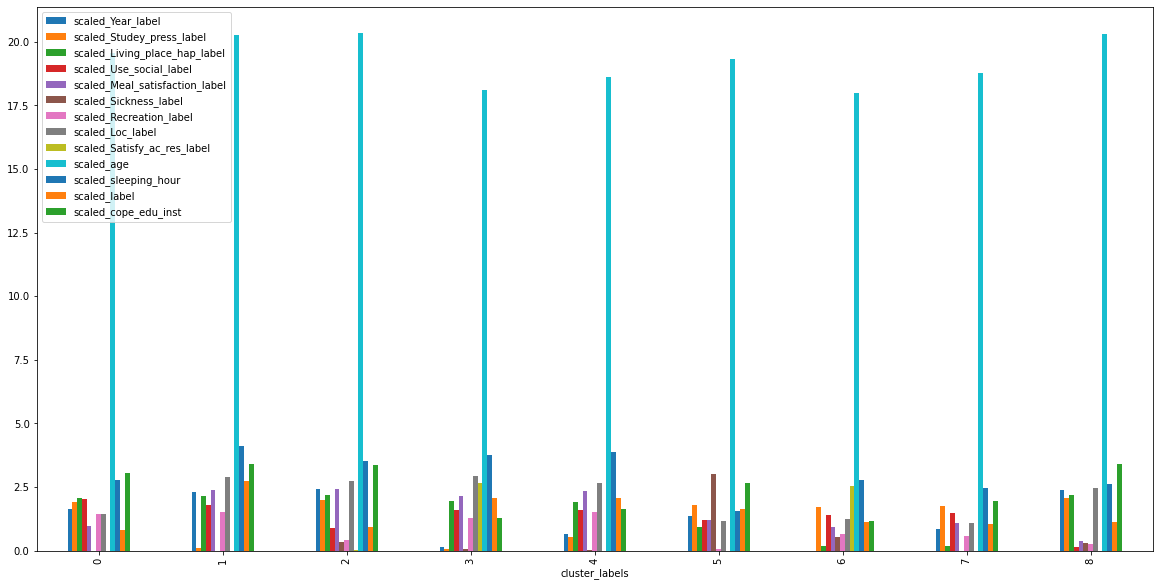

In [150]:

df.groupby('cluster_labels')[scaled_features].mean().plot(legend=True, kind='bar',figsize=(20,10))

plt.show()

In [151]:
for cluster in df['cluster_labels'].unique():
    print(cluster, df[df['cluster_labels'] == cluster]['Feelings_label'].values[:5])

1 [4 4 4 4 4]
6 [2 3 0 4 4]
7 [1 0 0 0 2]
2 [1 1 1 0 2]
0 [1 1 2 2 1]
3 [4 3 4 1 4]
4 [4 4 4 4 4]
5 [3 1 0 1 3]
8 [0 2 3 3 2]


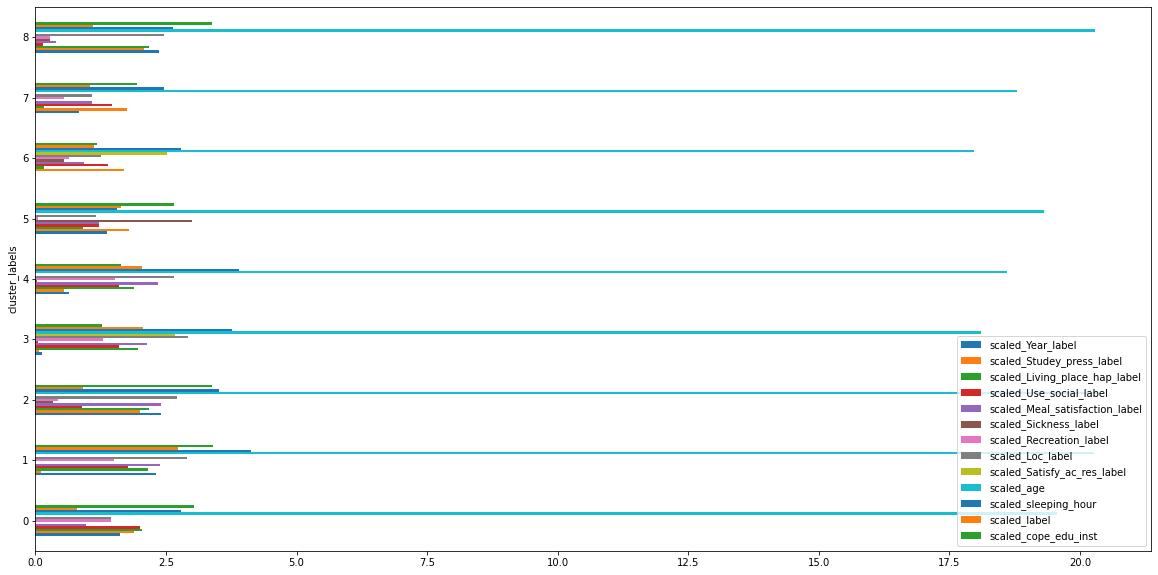

In [152]:
df.groupby('cluster_labels')[scaled_features].mean().plot(legend=True, kind='barh',figsize=(20,10))
plt.show()

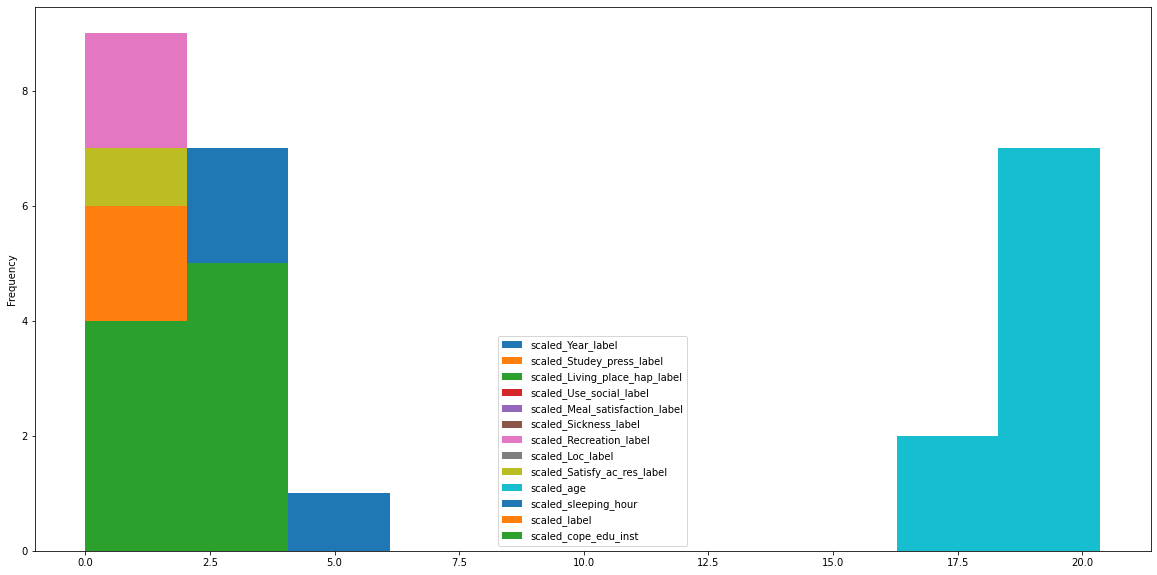

In [153]:
df.groupby('cluster_labels')[scaled_features].mean().plot(legend=True, kind='hist',figsize=(20,10))
plt.show()

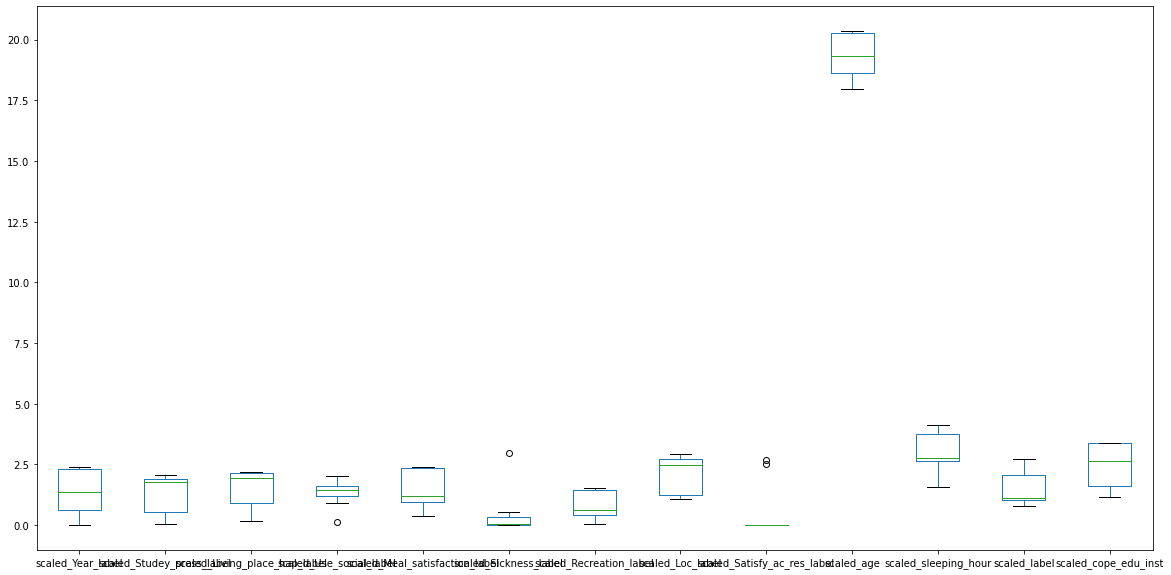

In [154]:
df.groupby('cluster_labels')[scaled_features].mean().plot(legend=True, kind='box',figsize=(20,10))
plt.show()

**Runtime for Part-1**

In [155]:
%timeit kmeans(df[scaled_features], 9)

10 loops, best of 3: 56.2 ms per loop


### ***Clustering Part-2 (Main)***

**By eliminating age (It is too high value) and other features which contains one unique values**

In [156]:
scaled_features=[
    'scaled_Year_label',
    'scaled_Studey_press_label',
    'scaled_Living_place_hap_label',
    'scaled_Use_social_label',
    'scaled_Meal_satisfaction_label',
    'scaled_Sickness_label',
    'scaled_Recreation_label',
    'scaled_Loc_label',
    'scaled_sleeping_hour',
    'scaled_cope_edu_inst'
]

**Elbow Plot**

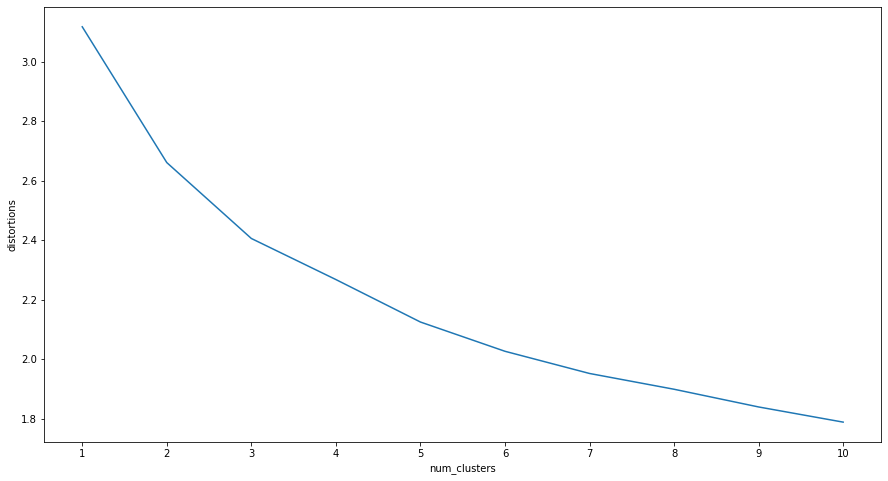

In [157]:
distortions=[]
num_clusters = range(1, 11)

for i in num_clusters:
    cluster_centers,distortion=kmeans(df[scaled_features],i)
    distortions.append(distortion)
    
elbow_plot=pd.DataFrame({
    'num_clusters':num_clusters,
    'distortions':distortions
})

plt.figure(figsize=(15, 8))

sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

**Dendrogram**

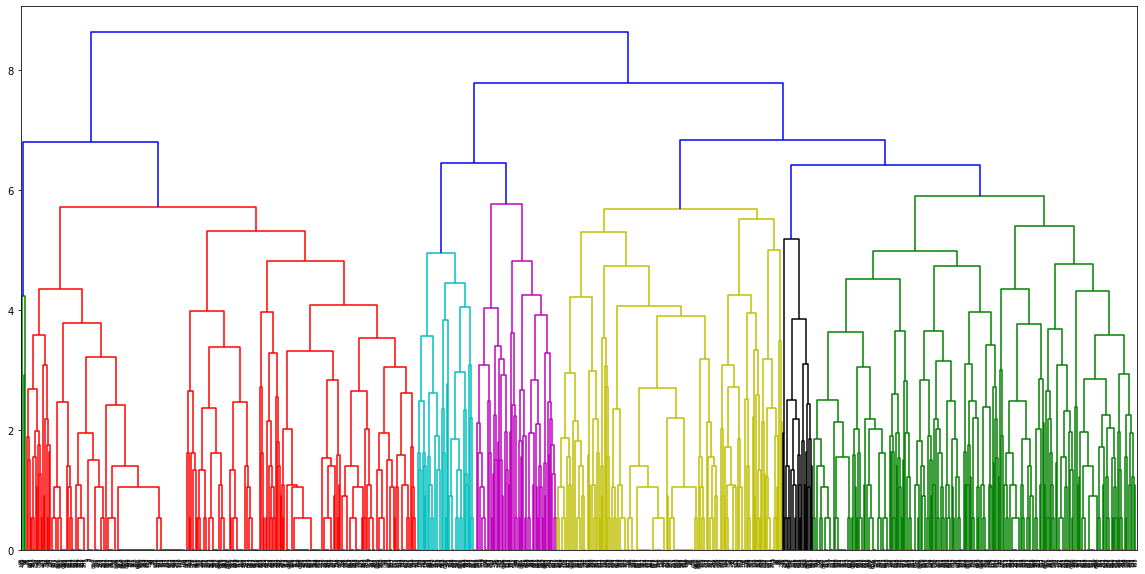

In [158]:
plt.figure(figsize=(20,10))

Z1 = linkage(df[scaled_features],method='complete',metric='euclidean')

dn = dendrogram(Z1)

plt.show()

In [159]:
cluster_centers,_ = kmeans(df[scaled_features], 8)

df['cluster_labels'], _ = vq(df[scaled_features], cluster_centers)
df.groupby('cluster_labels')[scaled_features].mean()

,scaled_Year_label,scaled_Studey_press_label,scaled_Living_place_hap_label,scaled_Use_social_label,scaled_Meal_satisfaction_label,scaled_Sickness_label,scaled_Recreation_label,scaled_Loc_label,scaled_sleeping_hour,scaled_cope_edu_inst
cluster_labels,,,,,,,,,,
0,2.306344,0.302352,2.136252,1.976766,2.349661,0.021361,1.593325,2.849486,4.007216,3.366177
1,2.356937,2.009391,2.160396,0.226656,0.442890,0.323309,0.137018,2.488117,2.619231,3.355082
2,2.341897,1.947028,2.175093,0.608165,2.409162,0.365265,0.247679,2.654836,3.513968,3.351762
3,1.634643,2.058450,2.000085,1.903782,0.739470,0.000000,1.608310,1.394090,2.710553,3.091560
4,1.041860,1.717500,0.681210,1.175001,1.067118,2.990609,0.044569,1.172232,1.709856,2.298853
5,0.438445,1.415230,0.245231,1.664923,2.165884,0.029320,1.073578,1.375318,3.151209,1.543837
6,0.423317,0.397691,2.158489,1.520413,2.270172,0.022829,1.439632,2.933705,3.920849,1.474073
7,0.567198,1.793499,0.159153,1.457372,0.562515,0.000000,0.432777,1.051405,2.370262,1.696105


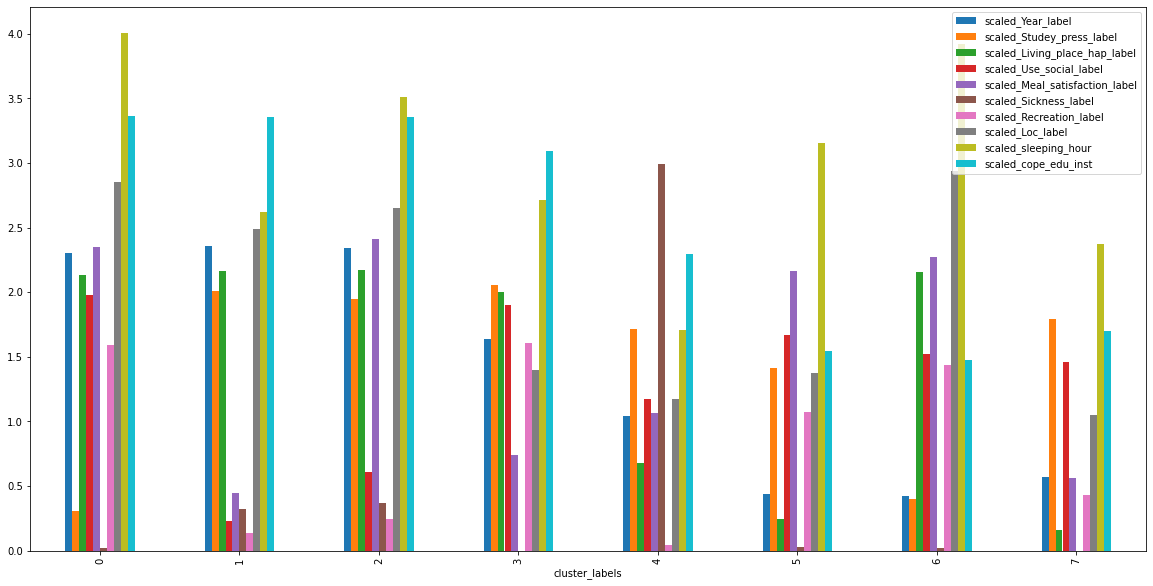

In [160]:
df.groupby('cluster_labels')[scaled_features].mean().plot(legend=True, kind='bar',figsize=(20,10))

plt.show()

In [161]:
for cluster in df['cluster_labels'].unique():
    print(cluster, df[df['cluster_labels'] == cluster]['Feelings_label'].values[:5])

0 [4 4 4 4 4]
4 [2 3 3 1 0]
7 [3 0 3 3 2]
5 [1 0 4 4 4]
2 [1 1 1 0 2]
6 [4 4 1 4 4]
3 [2 0 2 0 1]
1 [0 3 0 2 3]


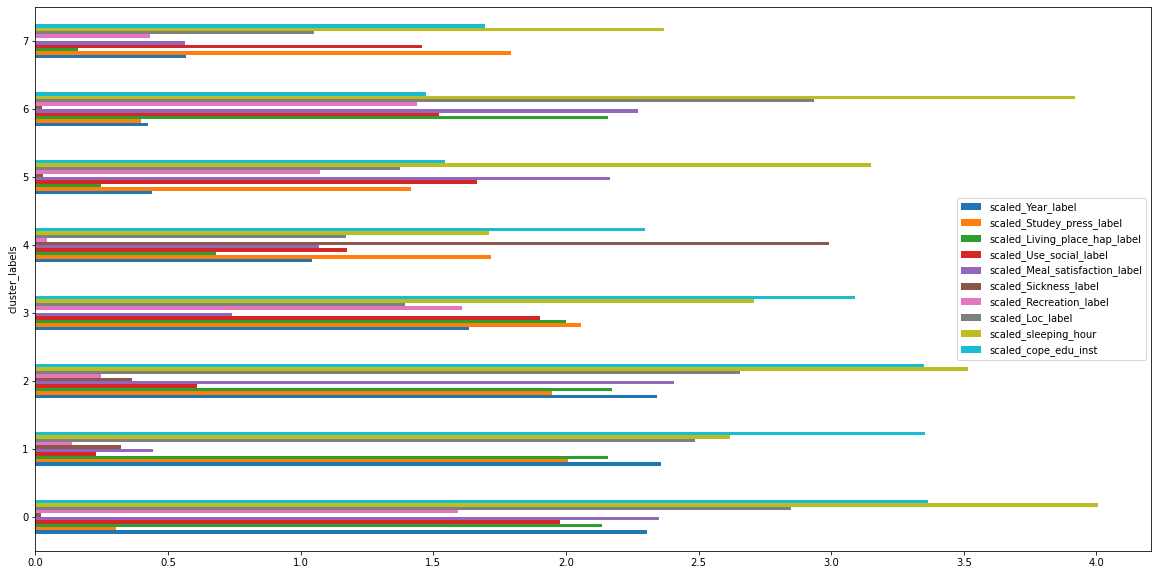

In [162]:
df.groupby('cluster_labels')[scaled_features].mean().plot(legend=True, kind='barh',figsize=(20,10))
plt.show()

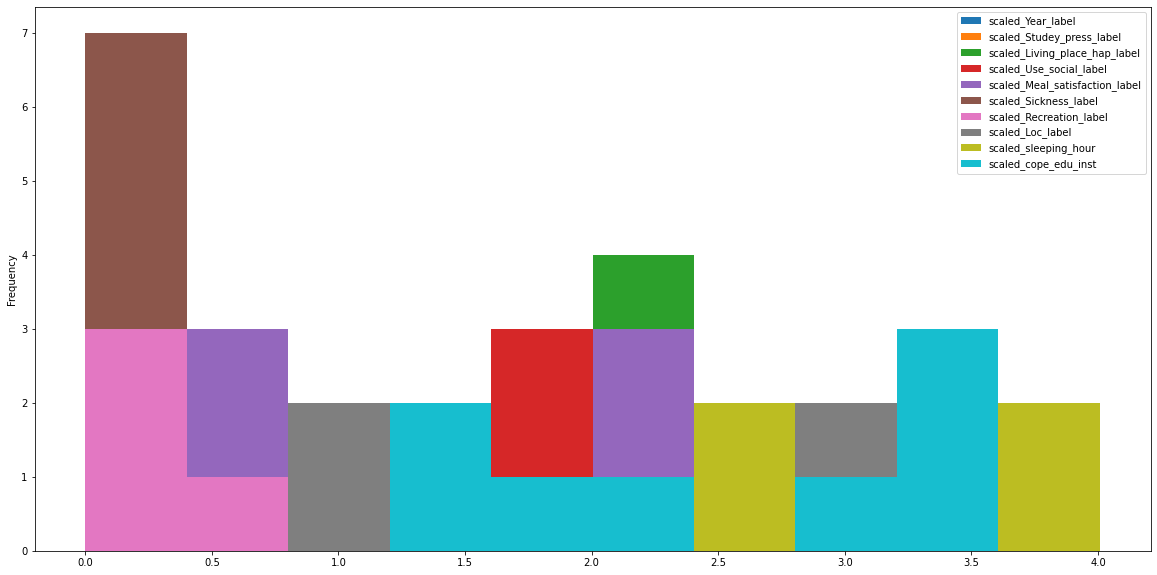

In [163]:
df.groupby('cluster_labels')[scaled_features].mean().plot(legend=True, kind='hist',figsize=(20,10))
plt.show()

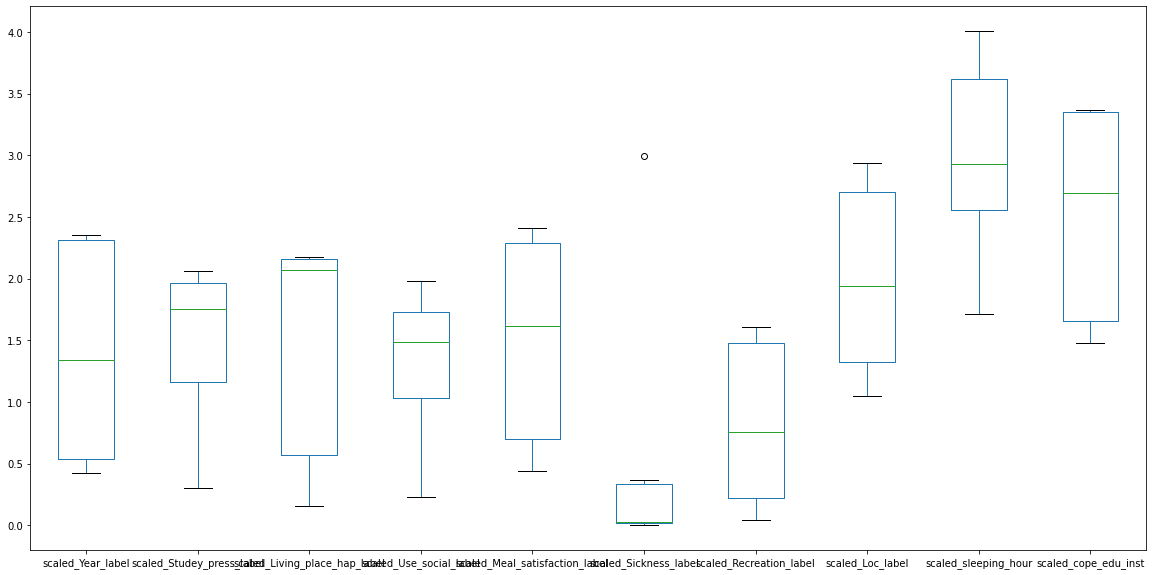

In [164]:
df.groupby('cluster_labels')[scaled_features].mean().plot(legend=True, kind='box',figsize=(20,10))
plt.show()

### ***Runtime for Part-2***

In [165]:
%timeit kmeans(df[scaled_features], 8)

10 loops, best of 3: 46.3 ms per loop


### ***Summary***

In [167]:
print("\n Part-2 gives more accurate understanding compared to Part-1 \n")
print("\n All clusters are nearby........ \n")


 Part-2 gives more accurate understanding compared to Part-1 


 All clusters are nearby........ 

